In [34]:
import xarray as xr

from scripts.open_preprocess_racmo import *
from scripts.paths import *

import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.colors as mcolors

import numpy as np


import pandas as pd

print("open masks")
masks1k = open_mask_1k()
masks55k = open_mask_5_5k()




open masks


Exception ignored in: <function CachingFileManager.__del__ at 0x168218cc0>
Traceback (most recent call last):
  File "/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: Bad file descriptor


gdal_translate NETCDF:"t2m.KNMI-2001.ANT27.ERAINx_RACMO2.4.1.3H.nc":t2m -a_ullr -32.75 29.75 32.5 -30.0  var_temp.tif


In [43]:
lons55k = masks55k.lon.values.flatten()
lats55k = masks55k.lat.values.flatten()

lons1k = masks1k.LON.values.flatten()
lats1k = masks1k.LAT.values.flatten()

path_grid_55k = os.path.join(pathDataTemp, 'RACMO_grid', 'RACMO_grid_5_5km.csv')

if not os.path.exists(os.path.dirname(path_grid_55k)):
    os.makedirs(os.path.dirname(path_grid_55k))

# pd.DataFrame({'lon':lons55k, 'lat':lats55k}).to_csv(path_grid_55k)
# pd.DataFrame({'lon':lons1k, 'lat':lats1k}).to_csv(path_grid_55k.replace('5_5km', '1km'))

## Grid comparison

Importing both files into QGIS allows us to compare both grids below, which shows us that that normal interpolation doesnt work

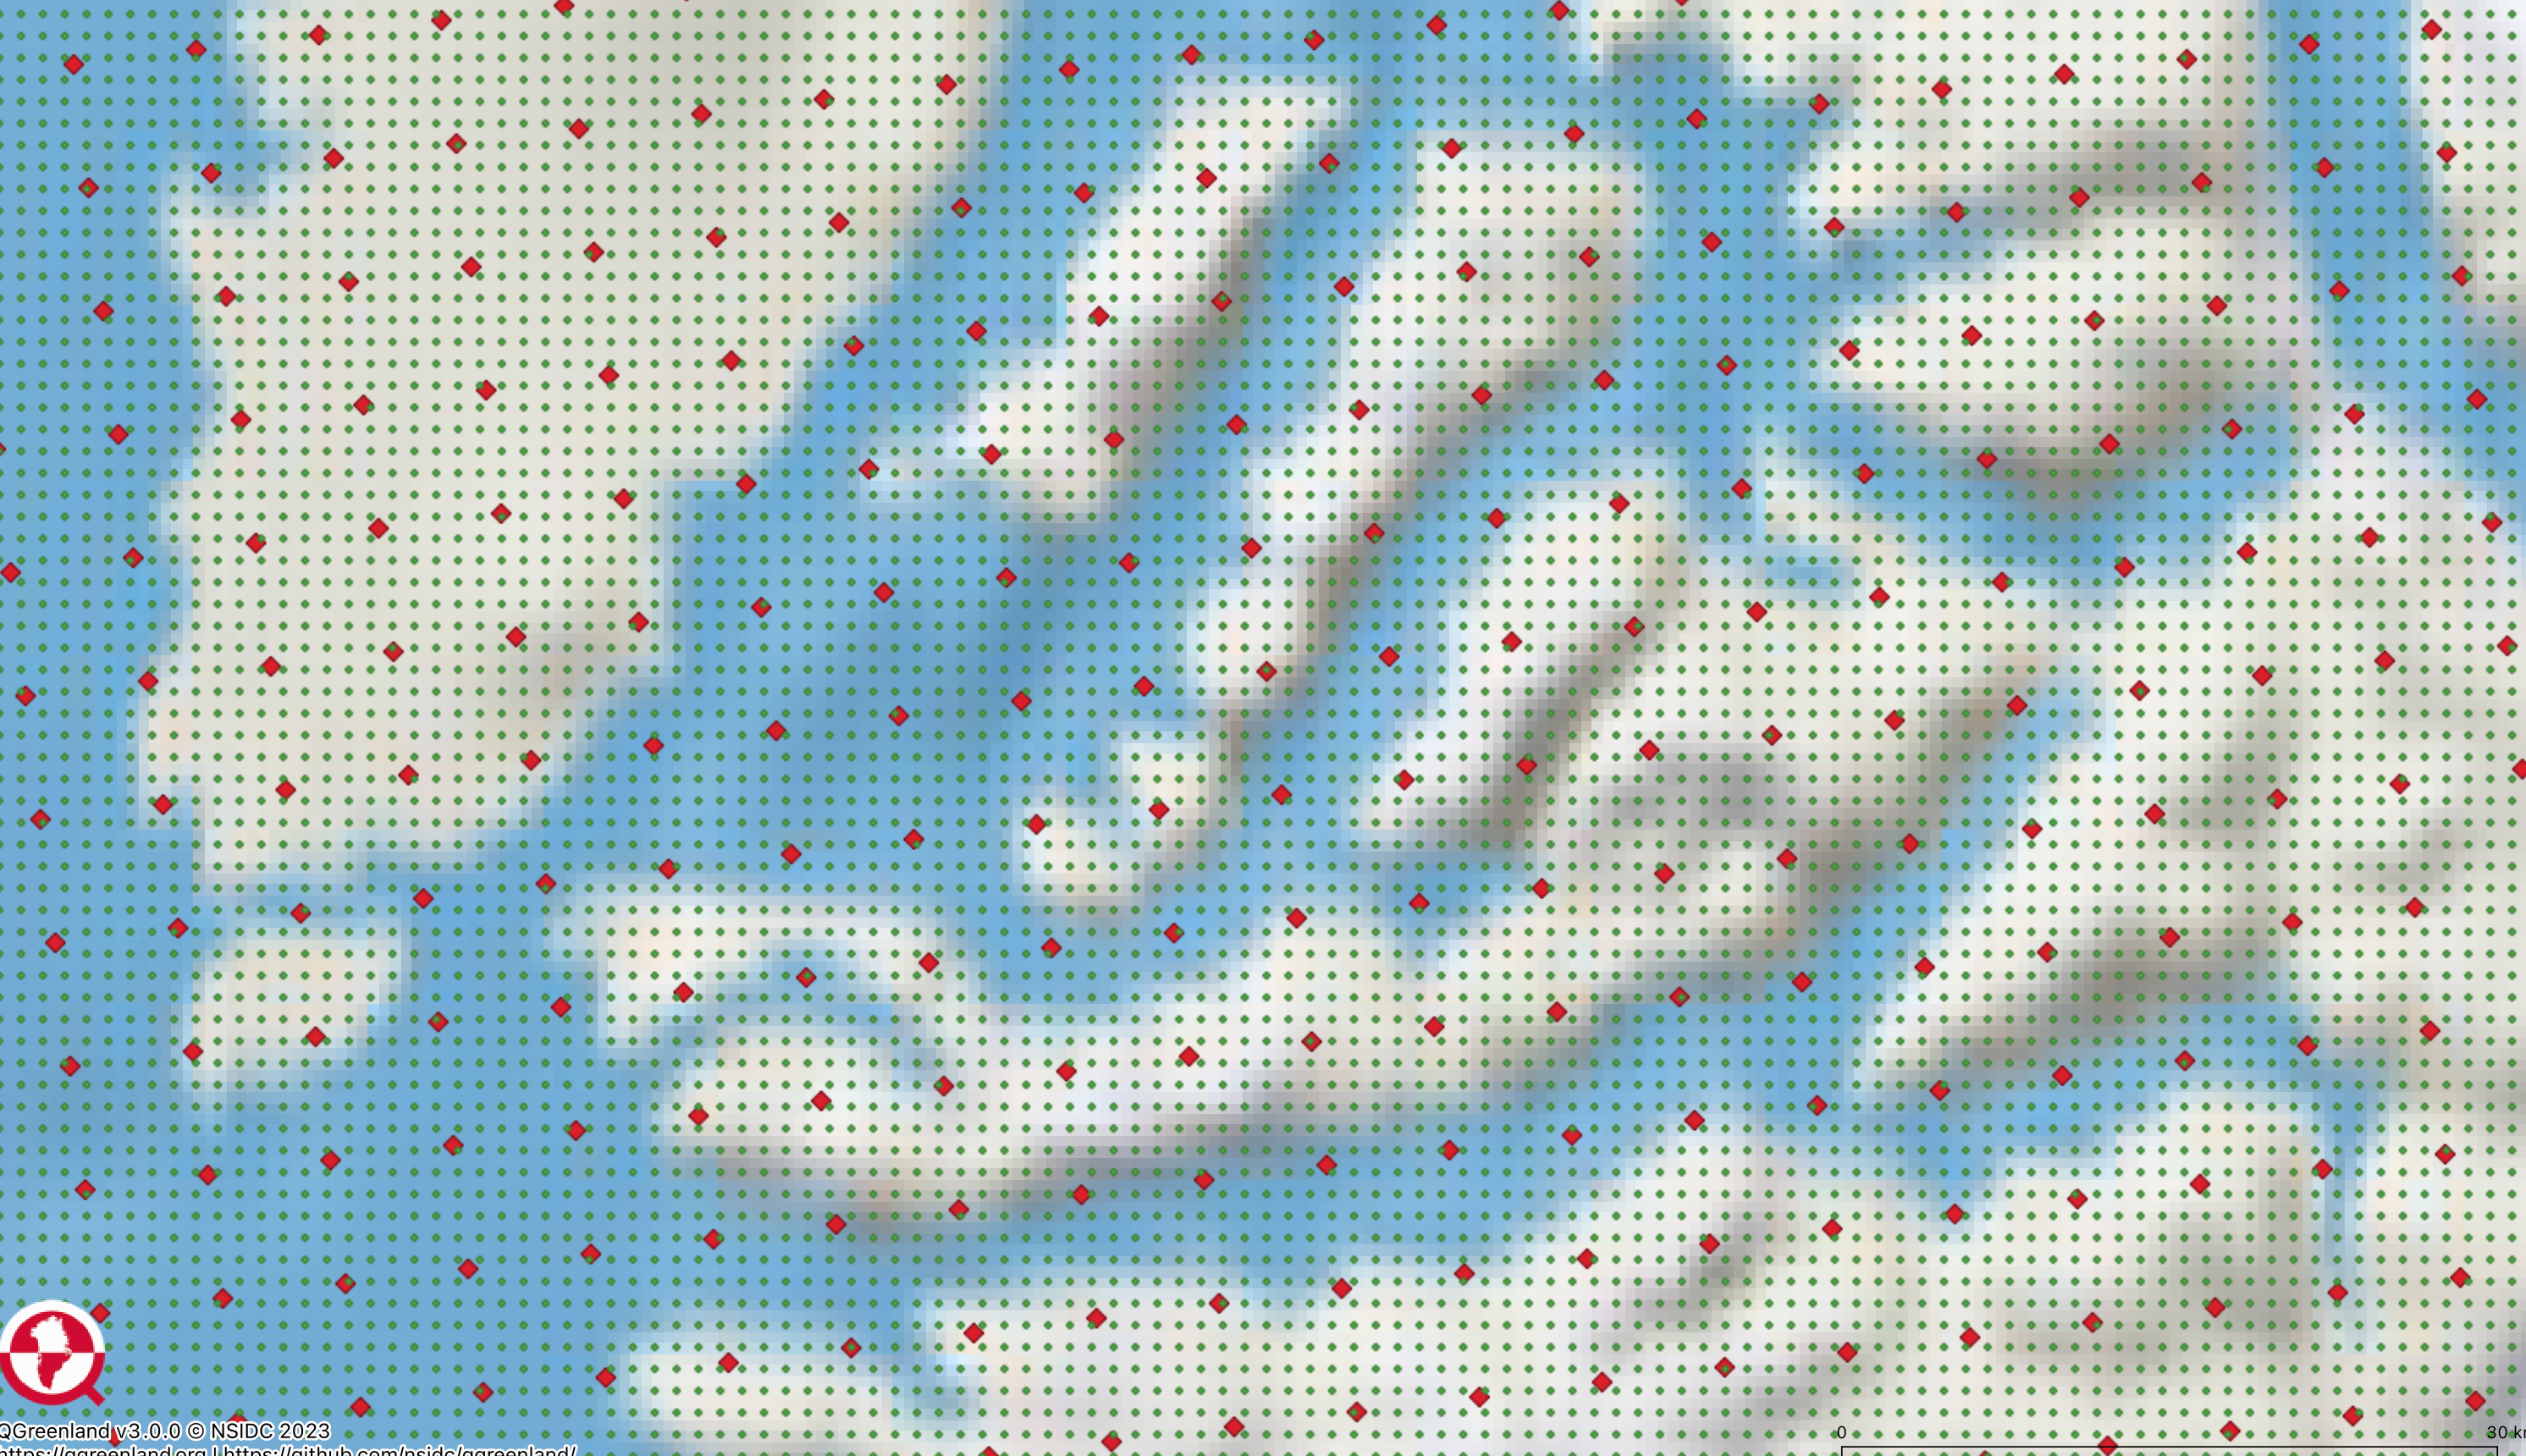

In [46]:
from IPython.display import Image
Image(filename='/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwaterII/results/figures/method/RACMO_grid/Zoom_NK.png')

Remapping with CDO

cdo remapbil,target_grid_projection.nc -setgrid,source_grid_projection.nc RACMO_file_source.nc outputfile.nc

in our case

cdo remapbil,grid_1km.nc -setgrid,'grid_5_5km.nc' 'MouginotBasins5_5km.nc' 'MouginotBasins1km.nc'

https://gitlab.tudelft.nl/slhermitte/manuals/-/blob/master/RACMO_reproject.md#cdo-method


In [12]:
# open all files that i just made
xr.open_dataset(pathDataTemp + 'grid_5_5km.nc')


<xarray.Dataset>
Dimensions:  (rlat: 566, rlon: 438)
Coordinates:
  * rlon     (rlon) float32 0.0 1.0 2.0 3.0 4.0 ... 434.0 435.0 436.0 437.0
  * rlat     (rlat) float32 0.0 1.0 2.0 3.0 4.0 ... 562.0 563.0 564.0 565.0
Data variables:
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
Attributes:
    title:                      FGRN055 Masks
    institution:                IMAU (Brice Noel)
    grid:                       Map Projection:Polar Stereographic Ellipsoid ...
    history:                    Wed Nov  7 14:41:41 2018: ncks -A -v Basins i...
    netcdf:                     4.4.1.1 of Nov 25 2017 10:57:26 $
    history_of_appended_files:  Wed Nov  7 14:41:41 2018: Appended file in/Ic...
    NCO:                        4.6.6
    nco_openmp_thread_number:   1